In [174]:
import pandas as pd
import numpy as np


In [ ]:
db = pd.read_csv("SAVSNET_TR_V2.csv", sep=";")

In [249]:
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression


In [97]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109895 entries, 0 to 109894
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Species                109895 non-null  object
 1   Breed                  109895 non-null  object
 2   Gender                 109895 non-null  object
 3   Histo_Cyto             109895 non-null  object
 4   Tumours_in_the_report  109895 non-null  int64 
 5   Primary_tumour         109895 non-null  object
 6   Grade_2_tier           13539 non-null   object
 7   Grade_3_tier           9660 non-null    object
 8   Location               108793 non-null  object
 9   Neutered               109895 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 8.4+ MB


In [2]:
testdb = pd.read_csv("SAVSNET_TR_V2.csv", sep=";")

In [3]:
testdb[(testdb["Species"]=="Feline")].Breed.value_counts()‹

Domestic Short Hair       5587
No_info                   2101
Domestic Long Hair         637
British Blue               171
Maine Coon                 125
Siamese                    112
Persian                     93
Bengal                      83
Ragdoll                     81
Burmese                     54
Norweigian Forest           25
Devon Rex                   17
American Short Hair         16
Oriental Shorthair          16
Russian Blue Shorthair      14
Sphynx                      12
Birman                      10
Tonkinese                    9
Egyptian Mau                 8
Cornish Rex                  7
Chinchilla                   6
Turkish Van                  5
Turkish Angora               5
Abyssinian                   5
Balinese                     4
Scottish Fold                4
Ocicat                       4
Burmilla                     3
Crossbreed                   3
Somali                       2
Asian Tiffany                2
RagaMuffin                   2
Pixie-Bo

In [4]:
from collections import Counter as C

In [5]:
db.head()
db.Location.value_counts().keys()

Index(['Mammary gland', 'Skin', 'Thorax', 'Forelimb', 'Hindlimb', 'Flank',
       'Abdomen', 'Oral cavity', 'Neck', 'Limb', 'Perianal region', 'Eyelid',
       'Gum', 'Back', 'Ear pinna', 'Face', 'Head', 'Lips', 'Tail', 'Spleen',
       'Testicle', 'Chest', 'Lymph node', 'Eye', 'Intestine', 'Anal sac gland',
       'Submandibular lymph node', 'Popliteal lymph node', 'Liver',
       'Thyroid gland', 'Pelvic region', 'Rectum', 'Mandible', 'Nasal cavity',
       'Haired skin', 'Stomach', 'Prescapular lymph node', 'Lung', 'Scrotum',
       'Pad', 'Prepuce', 'Ovary', 'Salivary gland', 'Dermis and subcutis',
       'Nipple', 'Vulva', 'Kidney', 'Prostate', 'Bladder', 'Urinary bladder',
       'Penis', 'Pancreas', 'Vagina', 'Perineal region', 'Inguinal lymph node',
       'Bone', 'Mesenteric lymph node', 'Urine', 'Generalised lymphadenopathy',
       'Uterus', 'Third eyelid', 'Mandibular lymph node', 'Parathyroid gland',
       'Ocular globe', 'Pharynx', 'Axillary lymph node', 'Omentum', 'Lary

In [6]:
db.Species.value_counts()

Canine    100664
Feline      9231
Name: Species, dtype: int64

In [7]:
db = db.drop(labels=["LaboratoryRef","TumourRef","Anonymous_PracticeID","ResultDate","Differentiation","Uncertain_terms","Unnamed: 15"], axis=1)

In [8]:
db.Grade_2_tier.value_counts()

Low-grade             9560
High-grade            2116
Intermediate-grade    1863
Name: Grade_2_tier, dtype: int64

In [9]:
db.Grade_3_tier.value_counts()

Grade 2    6802
Grade 1    2411
Grade 3     447
Name: Grade_3_tier, dtype: int64

In [10]:
db.Gender.value_counts()

Female neutered    37243
Male neutered      34235
Female entire      12131
Male entire        11959
Female              5721
Male                5651
No_info             2955
Name: Gender, dtype: int64

In [11]:
db["Gender"].replace("Female entire","Female", inplace=True)

In [12]:
db["Gender"].replace("Male entire", "Male", inplace=True)

In [13]:
db.Gender.value_counts()

Female neutered    37243
Male neutered      34235
Female             17852
Male               17610
No_info             2955
Name: Gender, dtype: int64

In [14]:
keylist = [val for val in db.Location.value_counts().keys()]

In [15]:
head = ["Oral cavity","Neck","Eyelid","Gum","Ear pinna","Face","Head","Lips","Eye","Mandible","Nasal cavity","Salivary gland","Third eyelid","Ocular globe","Pharynx","Larynx","Ocular orbit","Parotid gland","Esophagus","Retina","Tympanic bulla","Brain"]

In [16]:
extremities = ["Forelimb","Hindlimb","Flank","Limb","Tail","Pad"]

In [17]:
lymph_sys = ["Lymph node","Submandibular lymph node","Popliteal lymph node","Thyroid gland","Prescapular lymph node","Inguinal lymph node","Mesenteric lymph node","Generalised lymphadenopathy","Mandibular lymph node","Parathyroid gland","Axillary lymph node","Mammary lymph node","Mediastinal lymph node","Retropharyngeal lymph node","Iliac lymph node","Cervical lymph node","Sacral lymph node"]

In [18]:
trunk_ex = ["Skin","Thorax","Abdomen","Back","Chest","Dermis and subcutis","Haired skin","Nipple","Trunk"]

In [19]:
trunk_in = ["Mammary gland","Spleen","Intestine","Liver","Stomach","Lung","Ovary","Kidney","Bladder","Urinary bladder","Pancreas","Bone","Urine","Uterus","Omentum","Heart","Thymus","Adrenal gland","Mediastin","Alimentary tract","Bone marrow","Bile duct","Bronchus"]

In [20]:
pelvic = ["Perianal region","Testicle","Anal sac gland","Pelvic region","Rectum","Scrotum","Prepuce","Vulva","Prostate","Penis","Vagina","Perineal region","urethra"]

In [21]:
len(head)+len(extremities)+len(lymph_sys)+len(trunk_ex)+len(trunk_in)+len(pelvic)

90

In [22]:
len(keylist)

90

In [23]:
loc_list = [head,extremities,lymph_sys,trunk_ex,trunk_in,pelvic]

In [24]:
checklist = []
for location in loc_list:
    for subloc in location:
        checklist.append(subloc)

In [25]:
error_list = []
for ind, val in enumerate(sorted(checklist)):
    error_list.append((val,sorted(keylist)[ind]))

In [26]:
error_list[44]

('Mesenteric lymph node', 'Mesenteric lymph node')

In [27]:
mapping_dict = {}
for val in head:
    mapping_dict[val] = "head"
for val in extremities:
    mapping_dict[val] = "extremities"
for val in lymph_sys:
    mapping_dict[val] = "lymph_sys"
for val in trunk_ex:
    mapping_dict[val] = "trunk_ex"
for val in trunk_in:
    mapping_dict[val] = "trunk_in"
for val in pelvic:
    mapping_dict[val] = "pelvic"
        

In [28]:
mapping_dict

{'Oral cavity': 'head',
 'Neck': 'head',
 'Eyelid': 'head',
 'Gum': 'head',
 'Ear pinna': 'head',
 'Face': 'head',
 'Head': 'head',
 'Lips': 'head',
 'Eye': 'head',
 'Mandible': 'head',
 'Nasal cavity': 'head',
 'Salivary gland': 'head',
 'Third eyelid': 'head',
 'Ocular globe': 'head',
 'Pharynx': 'head',
 'Larynx': 'head',
 'Ocular orbit': 'head',
 'Parotid gland': 'head',
 'Esophagus': 'head',
 'Retina': 'head',
 'Tympanic bulla': 'head',
 'Brain': 'head',
 'Forelimb': 'extremities',
 'Hindlimb': 'extremities',
 'Flank': 'extremities',
 'Limb': 'extremities',
 'Tail': 'extremities',
 'Pad': 'extremities',
 'Lymph node': 'lymph_sys',
 'Submandibular lymph node': 'lymph_sys',
 'Popliteal lymph node': 'lymph_sys',
 'Thyroid gland': 'lymph_sys',
 'Prescapular lymph node': 'lymph_sys',
 'Inguinal lymph node': 'lymph_sys',
 'Mesenteric lymph node': 'lymph_sys',
 'Generalised lymphadenopathy': 'lymph_sys',
 'Mandibular lymph node': 'lymph_sys',
 'Parathyroid gland': 'lymph_sys',
 'Axillary

In [29]:
db.Location.replace(mapping_dict, inplace=True)

In [30]:
db.Location.value_counts()

trunk_ex       31224
extremities    23759
head           23307
trunk_in       18847
pelvic          7689
lymph_sys       3967
Name: Location, dtype: int64

In [31]:
db.columns

Index(['Species', 'Breed', 'Gender', 'Histo_Cyto', 'Tumours_in_the_report',
       'Primary_tumour', 'Grade_2_tier', 'Grade_3_tier', 'Location'],
      dtype='object')

In [34]:
Ydata

,Species,Breed,Gender,Histo_Cyto,Primary_tumour,Grade_2_tier,Grade_3_tier,Location
0,Canine,Cavalier King Charles Spaniel,Male,Histology,Sebaceous adenoma,NaN,NaN,head
1,Canine,Cocker Spaniel,Male neutered,Cytology,Lipoma,NaN,NaN,trunk_ex
2,Canine,Labrador Retriever,Female neutered,Cytology,Lipoma,NaN,NaN,trunk_ex
3,Canine,Labrador Retriever,Female neutered,Cytology,Mast cell tumour,NaN,NaN,trunk_ex
4,Canine,Labrador Retriever,Male neutered,Cytology,Lipoma,NaN,NaN,trunk_ex
...,...,...,...,...,...,...,...,...
109890,Canine,Crossbreed,Female neutered,Cytology,Lipoma,NaN,NaN,trunk_ex
109891,Canine,Crossbreed,Female neutered,Cytology,Basal cell tumour,NaN,NaN,head
109892,Canine,Flat-Coated Retriever,Male neutered,Cytology,Histiocytic sarcoma,NaN,NaN,lymph_sys
109893,Canine,West Highland White Terrier,Male neutered,Histology,Carcinoma_others,NaN,NaN,head


In [35]:
neutered_list=[]
for val in db.Gender:
    if "neutered" in val:
        neutered_list.append(1)
    else:
        neutered_list.append(0)

In [36]:
db["Neutered"]=neutered_list

In [37]:
db.head()

,Species,Breed,Gender,Histo_Cyto,Tumours_in_the_report,Primary_tumour,Grade_2_tier,Grade_3_tier,Location,Neutered
0,Canine,Cavalier King Charles Spaniel,Male,Histology,1,Sebaceous adenoma,NaN,NaN,head,0
1,Canine,Cocker Spaniel,Male neutered,Cytology,1,Lipoma,NaN,NaN,trunk_ex,1
2,Canine,Labrador Retriever,Female neutered,Cytology,1,Lipoma,NaN,NaN,trunk_ex,1
3,Canine,Labrador Retriever,Female neutered,Cytology,1,Mast cell tumour,NaN,NaN,trunk_ex,1
4,Canine,Labrador Retriever,Male neutered,Cytology,3,Lipoma,NaN,NaN,trunk_ex,1


In [38]:
db.Breed.value_counts()

No_info                       19700
Crossbreed                    14464
Labrador Retriever            11826
Staffordshire Bull Terrier     6548
Domestic Short Hair            5591
                              ...  
Borzoi                            1
Estrela Mountain Dog              1
Exotic Shorthair                  1
Kuvasz                            1
Lowchen                           1
Name: Breed, Length: 216, dtype: int64

In [39]:
sporting = ["Spaniel","Pointer","Retriever","Setter","Beagle"]
herding = ["herd","Cattle","Sheep","Collie","collie","Kelpie","Corgi","Mountain","Heeler"]
working = ["Akita", "Malamute","Bulldog","Husky","Terrier","Boxer","Shar-Pei","Chow","Pinscher","Schnauzer","Dane","Mastiff","Rottweiler","Bernard"]
toy=["Bichon","Chihuahua","Toy","Italian Greyhound","Chin","King Charles","Lowchen","Maltese","Miniature","Papillon","Pomeranian","Pug","Yorkshire"]
non_sporting=["Dalmation","Spitz","Poodle","Shiba","Eskimo"]
common_domestic=["Domestic Short Hair","Domestic Long Hair", "American Short Hair"]

In [40]:
test = db.Breed.copy()
groups = [("sporting",sporting),("herding",herding),("working",working),("toy",toy),("non_sporting",non_sporting),("common_domestic",common_domestic)]

In [41]:
def breed_sorter(breed_names,groups):
    breed_dict={}
    for name in breed_names:
        for cat, group in groups:
            for indicator in group:
                if indicator in name:
                    breed_dict[name]=cat
                if "No_info" in name:
                    breed_dict[name]="other"
    return breed_dict


In [43]:
breed_mapping_dict = breed_sorter(test,groups)

In [44]:
test.replace(breed_mapping_dict,inplace=True)

In [45]:
test.value_counts()

sporting               25823
working                22627
other                  19700
Crossbreed             14464
common_domestic         6244
                       ...  
Shipoo                     1
Schnoodle                  1
Tervueren                  1
European Short hair        1
Swedish Lapphund           1
Name: Breed, Length: 107, dtype: int64

In [46]:
grouplist = [val[0] for val in groups]

In [47]:
grouplist

['sporting', 'herding', 'working', 'toy', 'non_sporting', 'common_domestic']

In [48]:
for val in test:
    if val not in grouplist:
        breed_mapping_dict[val]="other"

In [49]:
db.Breed.replace(breed_mapping_dict, inplace=True)

In [50]:
db.Gender.replace("Male neutered","Male", inplace=True)
db.Gender.replace("Female neutered", "Female", inplace=True)

In [51]:
db.Gender.value_counts()

Female     55095
Male       51845
No_info     2955
Name: Gender, dtype: int64

In [52]:
db.Breed.value_counts()

other              43896
sporting           25823
working            22627
common_domestic     6244
toy                 6021
herding             4581
non_sporting         703
Name: Breed, dtype: int64

In [210]:
db.Primary_tumour.value_counts()

Lipoma                                  22421
Mast Cell Tumour                        13530
Carcinoma                               12712
Sarcoma                                  7789
Histiocytoma                             7681
                                        ...  
Trichofolliculoma                          13
Chondroma                                  13
Osteoma                                    11
Transmissible Venereal Tumour              11
Amyloid-Producing Odontogenic Tumour       11
Name: Primary_tumour, Length: 78, dtype: int64

In [211]:
other_tumours = {}
for tumour in db.Primary_tumour:
    if tumour not in tumour_types:
        other_tumours[tumour] = "Other"

In [214]:
db.Primary_tumour.replace(other_tumours, inplace=True)

In [215]:
y = db["Multiple_instances"]

In [265]:
x = db.drop(["Multiple_instances","Tumours_in_the_report","Grade_2_tier","Grade_3_tier"], axis=1)

In [266]:
x.Primary_tumour=x.Primary_tumour.str.capitalize()

In [267]:
x.columns

Index(['Species', 'Breed', 'Gender', 'Histo_Cyto', 'Primary_tumour',
       'Location', 'Neutered'],
      dtype='object')

In [268]:
Species = pd.get_dummies(x.Species, drop_first=True)
Breed = pd.get_dummies(x.Breed, drop_first = True)
Gender = pd.get_dummies(x.Gender, drop_first = True)
Histo_Cyto = pd.get_dummies(x.Histo_Cyto, drop_first = True)
Primary_tumour = pd.get_dummies(x.Primary_tumour, drop_first = True)
Location = pd.get_dummies(x.Location, drop_first = True)

x.drop(["Species","Breed","Gender","Histo_Cyto","Primary_tumour","Location"], axis=1, inplace=True)

x=pd.concat([x,Species,Breed,Gender,Histo_Cyto,Primary_tumour,Location],axis=1)
x.columns

Index(['Neutered', 'Feline', 'Herding', 'Non_sporting', 'Other', 'Sporting',
       'Toy', 'Working', 'Male', 'No_info', 'Histology', 'Lipoma', 'Lymphoma',
       'Other', 'Sarcoma', 'Head', 'Lymph_sys', 'Pelvic', 'Trunk_ex',
       'Trunk_in'],
      dtype='object')

In [269]:
x.drop(["Non_sporting","Working","Lymphoma","Lymph_sys"], axis=1, inplace=True)

In [465]:
regxtrain, regxtest, regytrain, regytest = train_test_split(x,y,test_size=.2, random_state=321)

In [466]:
logreg.fit(regxtrain,regytrain)

LogisticRegression()

In [306]:
logreg.score(regxtest,regytest)

0.7506710951362664

In [293]:
Ydata = db["Multiple_instances"]

In [294]:
Xdata = db.drop("Tumours_in_the_report", axis=1)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Neutered'),
  Text(1, 0, 'Feline'),
  Text(2, 0, 'Herding'),
  Text(3, 0, 'Other_tumour_type'),
  Text(4, 0, 'Sporting'),
  Text(5, 0, 'Toy'),
  Text(6, 0, 'Male'),
  Text(7, 0, 'Histology'),
  Text(8, 0, 'Lipoma'),
  Text(9, 0, 'Sarcoma'),
  Text(10, 0, 'Head'),
  Text(11, 0, 'Pelvic'),
  Text(12, 0, 'Trunk_ex'),
  Text(13, 0, 'Trunk_in')])

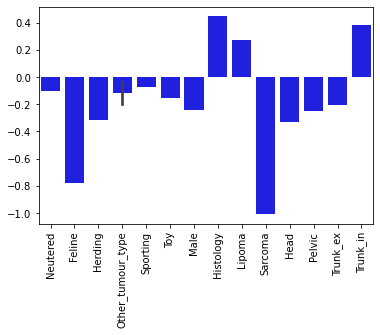

In [467]:
sns.barplot(regxtest.columns, logreg.coef_.flatten(), color='b')
plt.xticks(rotation=90)

In [273]:
x.columns

Index(['Neutered', 'Feline', 'Herding', 'Other', 'Sporting', 'Toy', 'Male',
       'No_info', 'Histology', 'Lipoma', 'Other', 'Sarcoma', 'Head', 'Pelvic',
       'Trunk_ex', 'Trunk_in'],
      dtype='object')

In [301]:
logreg=LogisticRegression()

In [206]:
tumour_list = list(set(db.Primary_tumour.copy()))
tumour_types = ["Carcinoma","carcinoma","Sarcoma","sarcoma","Myeloma","myeloma","Leukemia","leukemia","Lymphoma","lymphoma","Lipoma","lipoma"]

In [207]:
tumour_mapping_dict = {}
for tumour in tumour_list:
    for ttype in tumour_types:
        if ttype in tumour:
            tumour_mapping_dict[tumour]=ttype
        
        

In [208]:
tumour_mapping_dict

{'Lymphoma': 'Lymphoma',
 'Sarcoma': 'Sarcoma',
 'Carcinoma': 'Carcinoma',
 'Angiolipoma': 'lipoma',
 'Myelolipoma': 'lipoma',
 'Lipoma': 'Lipoma'}

In [209]:
db.Primary_tumour.replace(tumour_mapping_dict, inplace=True)

In [84]:
db.Breed=db.Breed.str.capitalize()
db.Primary_tumour=db.Primary_tumour.str.title()
db.Location=db.Location.str.capitalize()

In [105]:
count_list=[]
for val in db.Tumours_in_the_report:
    if val > 1:
        count_list.append(1)
    else:
        count_list.append(0)
        

In [107]:
db["Multiple_instances"]=count_list

In [110]:
db.Multiple_instances.value_counts()

0    82479
1    27416
Name: Multiple_instances, dtype: int64

In [279]:
Xdata = db.drop(labels=["Tumours_in_the_report","Grade_2_tier","Grade_3_tier","Multiple_instances"], axis=1)

In [312]:
Ydata = db.Multiple_instances

In [276]:
Xdata.Primary_tumour.value_counts()

Other        61778
Lipoma       22421
Carcinoma    12712
Sarcoma       7789
Lymphoma      5126
lipoma          69
Name: Primary_tumour, dtype: int64

In [280]:
Xdata.Primary_tumour = Xdata.Primary_tumour.str.capitalize()

In [282]:
Xdata.Primary_tumour.value_counts()

Other        61778
Lipoma       22490
Carcinoma    12712
Sarcoma       7789
Lymphoma      5126
Name: Primary_tumour, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split

In [283]:
X,Xtest,Y,Ytest = train_test_split(Xdata,Ydata,test_size=0.2,random_state=321)

In [284]:
Xtrain,Xhold,Ytrain,Yhold = train_test_split(X,Y,test_size=.25,random_state=321)

In [285]:
Ytrain

25543     1
52171     0
63874     1
42938     1
35709     0
         ..
405       0
79163     0
90601     0
5330      0
109237    0
Name: Multiple_instances, Length: 65937, dtype: int64

In [286]:
Xtrain

,Species,Breed,Gender,Histo_Cyto,Primary_tumour,Location,Neutered
25543,Canine,Working,Male,Cytology,Other,Pelvic,0
52171,Canine,Working,Male,Histology,Other,Trunk_in,1
63874,Canine,Toy,Male,Histology,Lipoma,Extremities,1
42938,Canine,Other,Male,Cytology,Other,Pelvic,0
35709,Canine,Other,Female,Cytology,Other,Extremities,1
...,...,...,...,...,...,...,...
405,Canine,Sporting,Female,Cytology,Lipoma,Trunk_ex,1
79163,Canine,Sporting,Female,Histology,Other,Extremities,1
90601,Feline,Common_domestic,Male,Histology,Other,Trunk_in,1
5330,Canine,Other,Female,Histology,Other,Trunk_in,0


In [287]:
Ytest

42032     0
2693      0
38788     1
73365     0
49378     0
         ..
22587     0
2911      0
107452    1
79453     0
10921     0
Name: Multiple_instances, Length: 21979, dtype: int64

In [288]:
Yhold

101052    0
32808     0
71862     1
79666     0
51896     1
         ..
103333    0
60690     0
98840     1
64683     1
14978     0
Name: Multiple_instances, Length: 21979, dtype: int64

In [289]:
from sklearn.metrics import (confusion_matrix,
                             precision_score,
                             recall_score,
                             f1_score,
                            precision_recall_curve)

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [391]:
decTree = DecisionTreeClassifier(max_depth=8)
ranTree = RandomForestClassifier(max_depth=8)

In [315]:
treeXdata=Xdata.drop(["Grade_2_tier","Grade_3_tier","Multiple_instances"], axis=1)
treeYdata=Ydata

0         0
1         0
2         0
3         0
4         1
         ..
109890    1
109891    1
109892    0
109893    0
109894    0
Name: Multiple_instances, Length: 109895, dtype: int64

In [310]:
treeXdata

,Species,Breed,Gender,Histo_Cyto,Primary_tumour,Location,Neutered
0,Canine,Toy,Male,Histology,Other,Head,0
1,Canine,Sporting,Male,Cytology,Lipoma,Trunk_ex,1
2,Canine,Sporting,Female,Cytology,Lipoma,Trunk_ex,1
3,Canine,Sporting,Female,Cytology,Other,Trunk_ex,1
4,Canine,Sporting,Male,Cytology,Lipoma,Trunk_ex,1
...,...,...,...,...,...,...,...
109890,Canine,Other,Female,Cytology,Lipoma,Trunk_ex,1
109891,Canine,Other,Female,Cytology,Other,Head,1
109892,Canine,Sporting,Male,Cytology,Sarcoma,Lymph_sys,1
109893,Canine,Working,Male,Histology,Carcinoma,Head,1


In [346]:
def quick_test(model, x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return (model.score(xtest, ytest), confusion_matrix(ytest,model.predict(xtest)))
# this code originated from the Metis Bootcamp Classification module, with addition of Confusion Matrix testing.

def multi_test(model, x, y, n=10):
    return (np.mean([quick_test(model, x, y)[0] for j in range(n)]),[quick_test(model, x, y)[1] for j in range(n)])

In [392]:
result_tuple = multi_test(decTree, x, y)

In [393]:
for val in result_tuple[1]:
    print(val)

[[23316  1397]
 [ 6531  1725]]
[[23849   998]
 [ 6824  1298]]
[[23785   951]
 [ 6948  1285]]
[[23232  1469]
 [ 6610  1658]]
[[23817   932]
 [ 6972  1248]]
[[23637  1024]
 [ 7011  1297]]
[[23606  1018]
 [ 7015  1330]]
[[23710  1032]
 [ 6868  1359]]
[[23688  1030]
 [ 6938  1313]]
[[23360  1360]
 [ 6564  1685]]


In [395]:
result_tuple[0]

0.7599199247778216

In [396]:
ran_results = multi_test(ranTree, x, y)

In [397]:
ran_results[0]

0.7551366435136037

In [406]:
lr2 = LogisticRegression()

In [421]:
reg_results=multi_test(lr2,x,y)
print(reg_results[0])

0.7495677757893778


In [408]:
for val in reg_results[1]:
    print(val)

[[24686    58]
 [ 8190    35]]
[[24784    55]
 [ 8094    36]]
[[24583    64]
 [ 8287    35]]
[[24643    59]
 [ 8228    39]]
[[24751    62]
 [ 8124    32]]
[[24695    85]
 [ 8154    35]]
[[24590    56]
 [ 8296    27]]
[[24598    55]
 [ 8279    37]]
[[24767    44]
 [ 8123    35]]
[[24749    26]
 [ 8177    17]]


<AxesSubplot:>

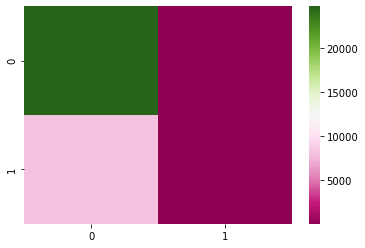

In [478]:
sns.heatmap(reg_results[1][0], cmap="PiYG")

Index(['Neutered', 'Feline', 'Herding', 'Other', 'Sporting', 'Toy', 'Male',
       'No_info', 'Histology', 'Lipoma', 'Other', 'Sarcoma', 'Head', 'Pelvic',
       'Trunk_ex', 'Trunk_in'],
      dtype='object')

In [330]:
column_dict = {'Neutered':'Neutered', 'Feline':'Feline', 'Herding':'Herding', 'Other':'Other_breeds', 'Sporting':'Sporting', 'Toy':'Toy', 'Male':'Male','No_info':'No_info', 'Histology':'Histology', 'Lipoma':'Lipoma', 'Other':'Other_tumour_type', 'Sarcoma':'Sarcoma', 'Head':'Head', 'Pelvic':'Pelvic','Trunk_ex':'Trunk_ex','Trunk_in':'Trunk_in'}
x.rename(columns=column_dict, inplace=True)    

In [332]:
x.drop("No_info", axis=1, inplace=True)

In [471]:
decresults = multi_test(decTree, x, y)

In [472]:
for val in decresults[1]:
    print(val)

[[23750   960]
 [ 6971  1288]]
[[23810   998]
 [ 6859  1302]]
[[23290  1368]
 [ 6604  1707]]
[[23721  1046]
 [ 6920  1282]]
[[23632   985]
 [ 7057  1295]]
[[23380  1426]
 [ 6537  1626]]
[[23706  1005]
 [ 6997  1261]]
[[23751   985]
 [ 6962  1271]]
[[23744  1035]
 [ 6879  1311]]
[[23760   968]
 [ 7037  1204]]


<AxesSubplot:>

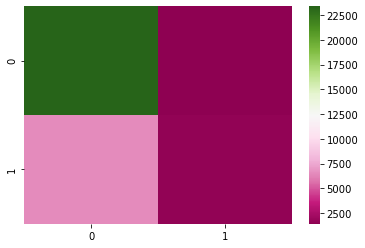

In [477]:
sns.heatmap(decresults[1][5], cmap="PiYG")

In [479]:
ranresults = multi_test(ranTree,x,y)

In [480]:
for val in ranresults[1]:
    print(val)

[[24396   363]
 [ 7768   442]]
[[24343   408]
 [ 7651   567]]
[[24229   518]
 [ 7510   712]]
[[24433   420]
 [ 7563   553]]
[[24721   166]
 [ 7860   222]]
[[24224   531]
 [ 7504   710]]
[[24204   576]
 [ 7439   750]]
[[24314   449]
 [ 7590   616]]
[[24451   386]
 [ 7606   526]]
[[24238   550]
 [ 7454   727]]


<AxesSubplot:>

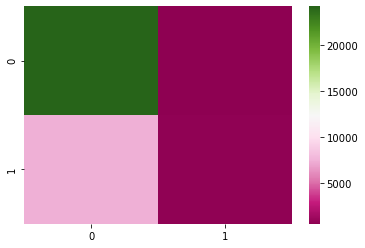

In [484]:
sns.heatmap(ranresults[1][6], cmap="PiYG")

In [380]:

from sklearn.ensemble import AdaBoostClassifier


In [387]:
AdaBoost = AdaBoostClassifier(n_estimators=100)

In [388]:
adaresults=multi_test(AdaBoost,x,y)

In [389]:
for val in adaresults[1]:
    print(val)

[[24698    42]
 [ 8210    19]]
[[24784    32]
 [ 8134    19]]
[[24709    34]
 [ 8201    25]]
[[24716    29]
 [ 8205    19]]
[[24582    31]
 [ 8335    21]]
[[24790    32]
 [ 8121    26]]
[[24821    34]
 [ 8092    22]]
[[24667    27]
 [ 8248    27]]
[[24566    15]
 [ 8374    14]]
[[24723    27]
 [ 8208    11]]


In [394]:
adaresults[0]

0.7503958263823592

In [487]:
model_list=[("Decision_Tree", decTree),("Logistic Regression", lr2)]
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=model_list,voting="hard",weights=[2,1.42])

In [488]:
vcresults = multi_test(vc,x,y)

In [489]:
print(vcresults[0])

0.7599441899966636


In [490]:
for val in vcresults[1]:
    print(val)

[[23733  1019]
 [ 6951  1266]]
[[23765  1007]
 [ 6955  1242]]
[[23719   986]
 [ 6996  1268]]
[[23631  1062]
 [ 6927  1349]]
[[23794   953]
 [ 6964  1258]]
[[23843   966]
 [ 6866  1294]]
[[23748   967]
 [ 6989  1265]]
[[23660   983]
 [ 7005  1321]]
[[23589  1000]
 [ 6997  1383]]
[[23793  1011]
 [ 6899  1266]]


In [491]:
vcresults[0]

0.7599441899966636

<AxesSubplot:>

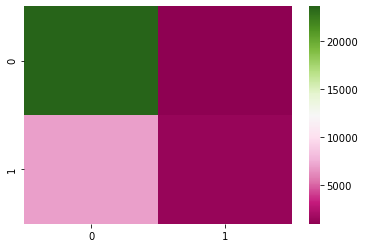

In [493]:
sns.heatmap(vcresults[1][8],cmap="PiYG")

In [451]:
x.columns

Index(['Neutered', 'Feline', 'Herding', 'Other_tumour_type', 'Sporting', 'Toy',
       'Male', 'Histology', 'Lipoma', 'Other_tumour_type', 'Sarcoma', 'Head',
       'Pelvic', 'Trunk_ex', 'Trunk_in'],
      dtype='object')

In [468]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109895 entries, 0 to 109894
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Neutered           109895 non-null  int64
 1   Feline             109895 non-null  uint8
 2   Herding            109895 non-null  uint8
 3   Other_tumour_type  109895 non-null  uint8
 4   Sporting           109895 non-null  uint8
 5   Toy                109895 non-null  uint8
 6   Male               109895 non-null  uint8
 7   Histology          109895 non-null  uint8
 8   Lipoma             109895 non-null  uint8
 9   Other_tumour_type  109895 non-null  uint8
 10  Sarcoma            109895 non-null  uint8
 11  Head               109895 non-null  uint8
 12  Pelvic             109895 non-null  uint8
 13  Trunk_ex           109895 non-null  uint8
 14  Trunk_in           109895 non-null  uint8
dtypes: int64(1), uint8(14)
memory usage: 2.3 MB
